<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Intro. Beautiful Soup - Nubes de Palabras  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

La librería Beatiful Soup es una biblioteca de Python para extraer datos de archivos HTML y XML.

- En este scrip solo veremos una breve funcionalidad de esta librería como motivación al estudio del ***Web Scraping***. Más adelante en el curso cuando veamos este tema abordaremos esta librería y otras como ***Selenium*.

# <FONT SIZE=5 COLOR="purple"> 1. INTRODUCCIÓN DE MOTIVACIÓN AL TEMA </FONT>

- Supongamos que tenemos la siguiente página Web

https://www.worldometers.info/world-population/population-by-country/

y queremos traer la tabla que está en esa página a Python para poderla explorar y trabajar.

¿Cómo hariamos esto?

En las siguientes líneas de código podemos encontrar una respuesta inicial para este ejercicio.

Primero, vamos a importar las librerías de trabajo

- **request**: para traer el código de HTML de la web.

- **BeautifulSoup** para mostrar el HTML más limpio y procesado.

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Definimos *url* la dirección *web* para tenerla presente.

In [19]:
url = "https://www.worldometers.info/world-population/population-by-country/"

Preparamos los datos que se van a importar desde la *url*

In [20]:
req = requests.get(url)

Observe que con la instrucción *req.text* podemos ver los caracteres de la página Web en texto.

In [21]:
req.text

'\n\n<!DOCTYPE html><!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1"> <title>Population by Country (2023) - Worldometer</title><meta name="description" content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population."><!-- Favicon --><link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon"><link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png"><link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png"><link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png"><link rel=

Utilizamos la librería *BeatifulSoup*

In [22]:
soup = BeautifulSoup(req.text)
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Population by Country (2023) - Worldometer</title><meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link h

Podemos revisar el título

In [23]:
soup.title

<title>Population by Country (2023) - Worldometer</title>

Buscamos la palabra clave **"table"**

In [24]:
data = soup.find_all("table")

luego utilizamos una función para que podamos leer los datos que están en formato HTML.

In [25]:
datos = pd.read_html(str(data))[0]
datos

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,2,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,3,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,4,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,5,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4386,-0.09 %,-4,44,100,0,1.6,44.0,11 %,0.00 %
230,231,Falkland Islands,3791,0.29 %,11,0,12170,0,1.6,40.0,62 %,0.00 %
231,232,Niue,1935,0.05 %,1,7,260,0,2.4,36.0,41 %,0.00 %
232,233,Tokelau,1893,1.18 %,22,189,10,0,2.6,27.0,0 %,0.00 %


luego, revisamos la cabeza de la tabla

In [26]:
datos.head()

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,2,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,3,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,4,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,5,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %


Como se pudo observar en el ejemplo anterior, la librería es muy útil para traer información de internet.

**Ejercicio:** Repita el proceso con la siguiente página

https://es.wikipedia.org/wiki/Anexo:Monedas_circulantes


In [29]:
url = "https://es.wikipedia.org/wiki/Anexo:Monedas_circulantes"
req = requests.get(url)
soup = BeautifulSoup(req.text)
data = soup.find_all("table")
datos = pd.read_html(str(data))[0]
datos.head()

,País o territorio,Divisa[17]​,Símbolo[18]​,Código ISO[17]​,Unidad fraccionaria,Número base
0,Abjasia,Ninguna,Ninguno,Ninguno,Apsar[n. 2]​[19]​,Ninguno
1,Abjasia,Rublo ruso,₽,RUB,Kopek,100
2,Acrotiri y Dhekelia,Euro[20]​,€,EUR,Céntimo,100
3,Afganistán,Afgani afgano[21]​,؋,AFN,Pul,100
4,Albania,Lek albanés[22]​,L,ALL,Qintar,100


# <FONT SIZE=5 COLOR="purple"> 2. EJEMPLO CON BEAUTIFUL-SOUP </FONT>

Vamos a importar las siguientes librerías

In [27]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nl

[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\vboxuser\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Us

True

In [30]:
# librerías para manipular datos
import pandas as pd
import numpy as np
# librería para gráficas
import plotly.express as px
import matplotlib.pyplot as plt
# para expresiones regulares
import re
# Para las nubes de palabras
from wordcloud import WordCloud, ImageColorGenerator
# Para tokenizar
from nltk import word_tokenize
# Librería BeautifulSoup
from bs4 import BeautifulSoup
from urllib.request import urlopen

En este ejemplo vamos a importar la información de una página web, la limpiaremos y exploraremos mediante una nube de palabras y tablas de frecuencias el contenido general de la misma.


Primero, podemos traer el código HTML de la página web de múltiples maneras. Una de ellas es con la siguiente instrucción.

In [31]:
pagina=urlopen("https://urosario.edu.co/static/Maestria-en-MACC/Plan-de-estudios/#ECHTab4")
CodHTML=pagina.read().decode("utf-8")
CodHTML

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" >\r\n\r\n<!-- Mirrored from www.urosario.edu.co/Maestria-en-MACC/Plan-de-estudios/ by HTTrack Website Copier/3.x [XR&CO\'2014], Wed, 02 Nov 2022 01:18:11 GMT -->\r\n<!-- Added by HTTrack --><meta http-equiv="content-type" content="text/html;charset=utf-8" /><!-- /Added by HTTrack -->\r\n<head id="head"><title>\r\n\tMaestr&#237;a en Matem&#225;ticas Aplicadas y Ciencias de la Computaci&#243;n  - Universidad del Rosario\r\n</title><meta name="generator" content="Kentico 11.0 (build 11.0.7032) " /> \n<meta name="description" content="La Maestría en Matemáticas Aplicadas les permitirá profundizar sus conocimientos en matemáticas aplicadas y ciencias de la computación a través de 3 énfasis que responden a las necesidades de la Revolución 4.0: Ciencia de Datos Computacional, Ciberseguridad e Inteligencia Artificial." /> \n<me

Observe que este es el código en HTML de la página web. Por esa razón la presentación anterior.

Podriamos intentar revisar que sucede se dejamos solo texto y números del código anterior.

In [32]:
# esta expresión regular \W+ deja solo texto y números
CodHTMLclean1=re.split('\W+',CodHTML)
CodHTMLclean1

['',
 'DOCTYPE',
 'html',
 'PUBLIC',
 'W3C',
 'DTD',
 'XHTML',
 '1',
 '0',
 'Transitional',
 'EN',
 'http',
 'www',
 'w3',
 'org',
 'TR',
 'xhtml1',
 'DTD',
 'xhtml1',
 'transitional',
 'dtd',
 'html',
 'xmlns',
 'http',
 'www',
 'w3',
 'org',
 '1999',
 'xhtml',
 'Mirrored',
 'from',
 'www',
 'urosario',
 'edu',
 'co',
 'Maestria',
 'en',
 'MACC',
 'Plan',
 'de',
 'estudios',
 'by',
 'HTTrack',
 'Website',
 'Copier',
 '3',
 'x',
 'XR',
 'CO',
 '2014',
 'Wed',
 '02',
 'Nov',
 '2022',
 '01',
 '18',
 '11',
 'GMT',
 'Added',
 'by',
 'HTTrack',
 'meta',
 'http',
 'equiv',
 'content',
 'type',
 'content',
 'text',
 'html',
 'charset',
 'utf',
 '8',
 'Added',
 'by',
 'HTTrack',
 'head',
 'id',
 'head',
 'title',
 'Maestr',
 '237',
 'a',
 'en',
 'Matem',
 '225',
 'ticas',
 'Aplicadas',
 'y',
 'Ciencias',
 'de',
 'la',
 'Computaci',
 '243',
 'n',
 'Universidad',
 'del',
 'Rosario',
 'title',
 'meta',
 'name',
 'generator',
 'content',
 'Kentico',
 '11',
 '0',
 'build',
 '11',
 '0',
 '7032',
 'm

In [33]:
len(CodHTMLclean1)

17456

In [35]:
print(CodHTMLclean1[100:300])

['generator', 'content', 'Kentico', '11', '0', 'build', '11', '0', '7032', 'meta', 'name', 'description', 'content', 'La', 'Maestría', 'en', 'Matemáticas', 'Aplicadas', 'les', 'permitirá', 'profundizar', 'sus', 'conocimientos', 'en', 'matemáticas', 'aplicadas', 'y', 'ciencias', 'de', 'la', 'computación', 'a', 'través', 'de', '3', 'énfasis', 'que', 'responden', 'a', 'las', 'necesidades', 'de', 'la', 'Revolución', '4', '0', 'Ciencia', 'de', 'Datos', 'Computacional', 'Ciberseguridad', 'e', 'Inteligencia', 'Artificial', 'meta', 'http', 'equiv', 'content', 'type', 'content', 'text', 'html', 'charset', 'UTF', '8', 'meta', 'http', 'equiv', 'pragma', 'content', 'no', 'cache', 'meta', 'http', 'equiv', 'content', 'style', 'type', 'content', 'text', 'css', 'meta', 'http', 'equiv', 'content', 'script', 'type', 'content', 'text', 'javascript', 'meta', 'name', 'keywords', 'content', 'La', 'Maestría', 'en', 'Matemáticas', 'Aplicadas', 'matemáticas', 'aplicadas', 'maestría', 'en', 'ciencias', 'de', 'l

Sin embargo, al revisar la anterior lista sale muy "sucia" con código HTML. Vamos a usar otra forma que facilita la importación del código desde la página *url*.

In [36]:
# Para trabajar con info de páginas web from bs4 import BeautifulSoup
CodHTMLclean = BeautifulSoup(CodHTML).get_text()
CodHTMLclean

'\n\n\n\r\n\tMaestría en Matemáticas Aplicadas y Ciencias de la Computación  - Universidad del Rosario\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMaestría en Matemáticas Aplicadas y Ciencias de la Computación\n\n\n\n\n\n\n\n\n\n\n\n\n\nLa Universidad\n\n\n\n Historia y símbolos\r\n                     \n\n\n\n Enfoque estratégico\r\n                     \n\n\n\n Gobierno universitario\r\n                     \n\n\n\n Pilares de transformación\r\n                     \n\n\n\n\n Archivo histórico\r\n                     \n\n\n\n Museo\r\n                     \n\n\n\n Tienda Rosarista\r\n                     \n\n\n\n Manual de marca\r\n                     \n\n\n\n\nOferta académica\n\n\n Escuela de administración\n\n\nPregrados\n\n\nEspecializaciones\n\n\nMaestrías\n\n\nMaestrías GSB\n\n\nDoctorado\n\n\n\n\n Facultad de Jurisprudencia\n\n\nPregrados\n\n\

Veamos los 200 primeros carácteres y comparamos con lo anterior

In [37]:
CodHTMLclean[0:200]

'\n\n\n\r\n\tMaestría en Matemáticas Aplicadas y Ciencias de la Computación  - Universidad del Rosario\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMaestría en Mat'

Vamos a usar la librería **NLTK** para tokenizar.

- Cuando hagamos esto, todos esos *\n* que corresponden a saltos de página se eliminarán.

In [38]:
# tokenizador separa por espacios
tokens = nltk.word_tokenize(CodHTMLclean)
tokens[0:150]

['Maestría',
 'en',
 'Matemáticas',
 'Aplicadas',
 'y',
 'Ciencias',
 'de',
 'la',
 'Computación',
 '-',
 'Universidad',
 'del',
 'Rosario',
 'Maestría',
 'en',
 'Matemáticas',
 'Aplicadas',
 'y',
 'Ciencias',
 'de',
 'la',
 'Computación',
 'La',
 'Universidad',
 'Historia',
 'y',
 'símbolos',
 'Enfoque',
 'estratégico',
 'Gobierno',
 'universitario',
 'Pilares',
 'de',
 'transformación',
 'Archivo',
 'histórico',
 'Museo',
 'Tienda',
 'Rosarista',
 'Manual',
 'de',
 'marca',
 'Oferta',
 'académica',
 'Escuela',
 'de',
 'administración',
 'Pregrados',
 'Especializaciones',
 'Maestrías',
 'Maestrías',
 'GSB',
 'Doctorado',
 'Facultad',
 'de',
 'Jurisprudencia',
 'Pregrados',
 'Especializaciones',
 'Maestrías',
 'Maestrías',
 'GSB',
 'Doctorado',
 'Facultad',
 'de',
 'Ciencias',
 'Naturales',
 'Pregrados',
 'Maestrías',
 'Doctorados',
 'Facultad',
 'de',
 'Creación',
 'Pregrados',
 'Escuela',
 'de',
 'Ciencias',
 'Humanas',
 'Pregrados',
 'Especializaciones',
 'Maestrías',
 'Doctorado',


Observación: *tokens* es una lista de palabras y por lo tanto no aplica la función *lower()*

In [39]:
# cuidado: esto genera error
tokens.lower()

AttributeError: 'list' object has no attribute 'lower'

Debemos pasar a minúsculas antes de tokenizar, es más sencillo. O podemos construir una función que aplique *.lower()* a una lista.

In [40]:
CodHTMLclean =CodHTMLclean.lower()

¿Existe algún correo en está página web? Podría extraerlo?

In [41]:
# Para que coloque su respuesta aquí.

Ahora, vamos a tokenizar.

In [42]:
tokens = nltk.word_tokenize(CodHTMLclean)
tokens[0:150]

['maestría',
 'en',
 'matemáticas',
 'aplicadas',
 'y',
 'ciencias',
 'de',
 'la',
 'computación',
 '-',
 'universidad',
 'del',
 'rosario',
 'maestría',
 'en',
 'matemáticas',
 'aplicadas',
 'y',
 'ciencias',
 'de',
 'la',
 'computación',
 'la',
 'universidad',
 'historia',
 'y',
 'símbolos',
 'enfoque',
 'estratégico',
 'gobierno',
 'universitario',
 'pilares',
 'de',
 'transformación',
 'archivo',
 'histórico',
 'museo',
 'tienda',
 'rosarista',
 'manual',
 'de',
 'marca',
 'oferta',
 'académica',
 'escuela',
 'de',
 'administración',
 'pregrados',
 'especializaciones',
 'maestrías',
 'maestrías',
 'gsb',
 'doctorado',
 'facultad',
 'de',
 'jurisprudencia',
 'pregrados',
 'especializaciones',
 'maestrías',
 'maestrías',
 'gsb',
 'doctorado',
 'facultad',
 'de',
 'ciencias',
 'naturales',
 'pregrados',
 'maestrías',
 'doctorados',
 'facultad',
 'de',
 'creación',
 'pregrados',
 'escuela',
 'de',
 'ciencias',
 'humanas',
 'pregrados',
 'especializaciones',
 'maestrías',
 'doctorado',


**Nota:** cuando aplicamos word_tokenize no se eliminan carácteres especiales.

In [43]:
nltk.word_tokenize("fabian.? espera. @ el autobus!!")

['fabian.', '?', 'espera', '.', '@', 'el', 'autobus', '!', '!']

Veamos la cantidad de *tokens* que resultó de la página Web.

In [44]:
len(tokens)

4451

Podemos hacer la distribución de frecuencias por medio de la instrucción:

- ***Freq_dist_nltk***

Esto nos genera un diccionario con las frecuencias.



In [45]:
Freq_dist_nltk=nltk.FreqDist(tokens)
Freq_dist_nltk

FreqDist({'de': 440, ',': 183, 'y': 151, '.': 118, 'el': 110, 'la': 108, 'en': 102, 'los': 69, 'se': 55, 'las': 51, ...})

Podemos graficar el diccionario de frecuencias.

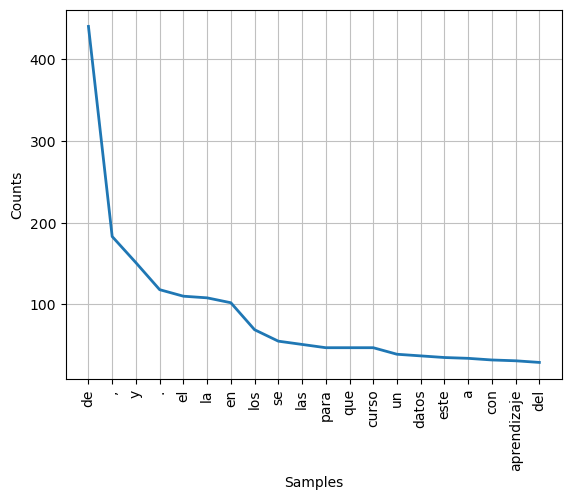

<Axes: xlabel='Samples', ylabel='Counts'>

In [46]:
# para hacer la gráfica de los primeros 20 registros del diccionario
Freq_dist_nltk.plot(20)

Observe que los primeros registros corresponden a elementos que no aportan información.

Ahora bien, eliminaremos las *stop-words* podemos usar:

- La librería de NTKL

- La librería stop-words

In [47]:
!pip install stop-words

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32918 sha256=629a58e908c018209ff50ddc07055b81049f2283554d03b669fd6779cedf49fa
  Stored in directory: c:\users\vboxuser\appdata\local\pip\cache\wheels\a3\2e\75\cb00ac68fe0eda6689c314cf87dee032f37bab4f9f4311d7fe
Successfully built stop-words


In [48]:
from stop_words import get_stop_words

Traemos las palabras de parada en español

In [49]:
get_stop_words("es")

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

Veamos algunos registros

In [50]:
# palabras de parada en español
stop_words=get_stop_words("es")
print(stop_words[30:50])

['esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará']


Eliminaremos las *stop_words* anteriores.

In [51]:
# generar una nueva lista eliminado esas palabras de parada
tokens_clean=[palabras for palabras in tokens if len(palabras)>1 and (palabras not in stop_words)]

Exploremos un poco esta variable

In [52]:
tokens_clean[0:100]

['maestría',
 'matemáticas',
 'aplicadas',
 'ciencias',
 'computación',
 'universidad',
 'rosario',
 'maestría',
 'matemáticas',
 'aplicadas',
 'ciencias',
 'computación',
 'universidad',
 'historia',
 'símbolos',
 'enfoque',
 'estratégico',
 'gobierno',
 'universitario',
 'pilares',
 'transformación',
 'archivo',
 'histórico',
 'museo',
 'tienda',
 'rosarista',
 'manual',
 'marca',
 'oferta',
 'académica',
 'escuela',
 'administración',
 'pregrados',
 'especializaciones',
 'maestrías',
 'maestrías',
 'gsb',
 'doctorado',
 'facultad',
 'jurisprudencia',
 'pregrados',
 'especializaciones',
 'maestrías',
 'maestrías',
 'gsb',
 'doctorado',
 'facultad',
 'ciencias',
 'naturales',
 'pregrados',
 'maestrías',
 'doctorados',
 'facultad',
 'creación',
 'pregrados',
 'escuela',
 'ciencias',
 'humanas',
 'pregrados',
 'especializaciones',
 'maestrías',
 'doctorado',
 'escuela',
 'medicina',
 'ciencias',
 'salud',
 'pregrados',
 'especializaciones',
 'maestrías',
 'doctorado',
 'premédico',
 'in

Ahora, calculamos de nuevo la tabla de frecuencias

In [53]:
Freq_dist_clean=nltk.FreqDist(tokens_clean)
Freq_dist_clean

FreqDist({'curso': 47, 'datos': 37, 'aprendizaje': 31, 'énfasis': 25, 'inteligencia': 23, 'cerrar': 23, 'sistemas': 22, 'maestrías': 20, 'análisis': 20, 'artificial': 19, ...})

De nuevo, la gráfica de frecuencias

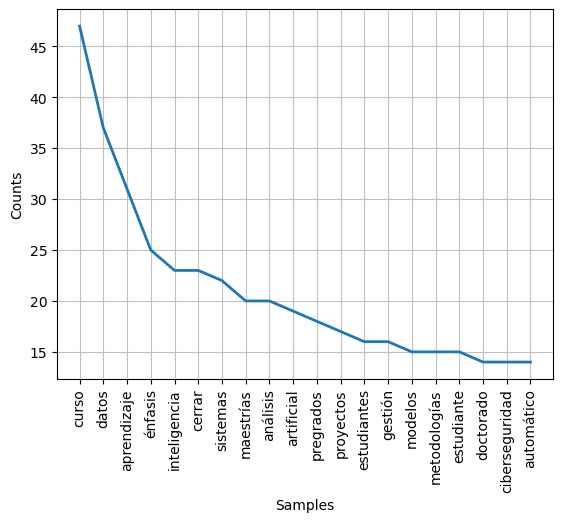

<Axes: xlabel='Samples', ylabel='Counts'>

In [54]:
Freq_dist_clean.plot(20)

Ahora, generamos la nube de palabras

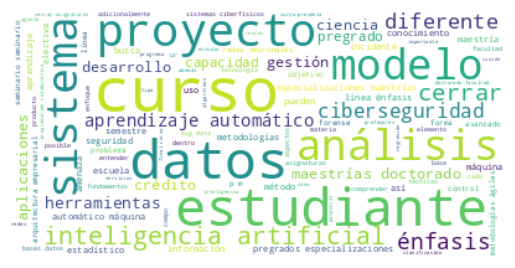

In [37]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(" ".join(tokens_clean))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

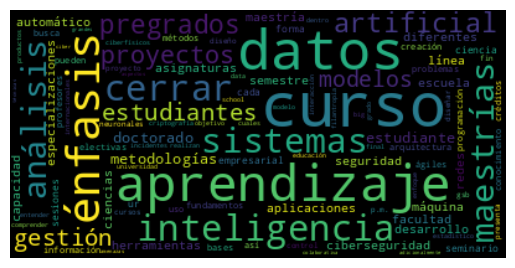

In [38]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black").generate_from_frequencies(Freq_dist_clean)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

¿Cuál es la diferencia de los códigos anteriores? ¿Generan la misma nube de palabras?


**Respuesta:**

Podemos guardar la imagen como

In [ ]:
image = wordcloud.to_image()
image.save("nube.png")
image.show()

# <FONT SIZE=5 COLOR="purple"> 3. GENERACIÓN DE LA NUBE CON FORMA </FONT>

Podemos generar una nube de palabras con una forma particular.

In [39]:
import PIL.Image
from IPython.display import display

Luego, nos podemos conectar al DRIVE y traer la imagen desde ahí.

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
estrella = PIL.Image.open("/content/drive/MyDrive/1.2 PLN (2023-2)/Copia de FOTO.jpg")
display(estrella)

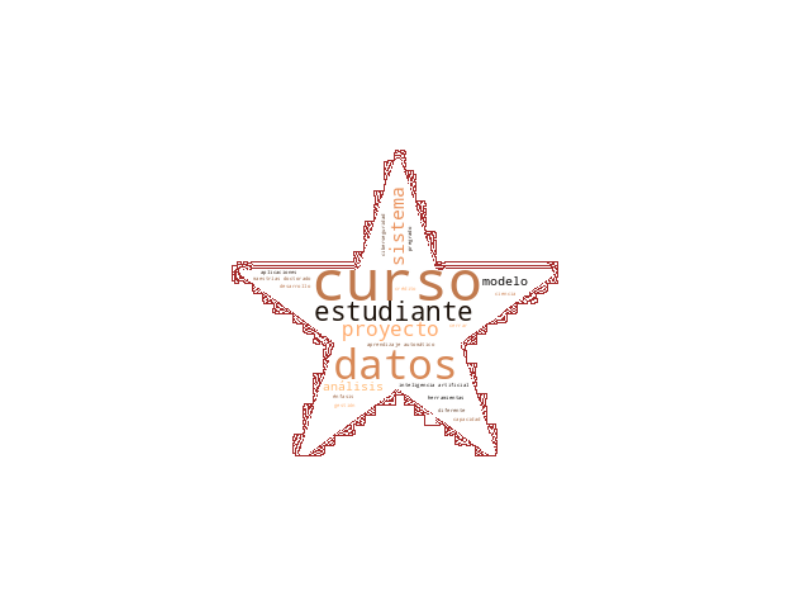

In [ ]:
cruz_mask = np.array(estrella)

wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150,
                      max_words=100,
                      background_color='white',
                      colormap='copper_r',
                      stopwords=None,
                      mask=cruz_mask,
                      contour_width=0.5,
                      contour_color='brown').generate(" ".join(tokens_clean))

wordcloud.to_file("cruz_wordcloud.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()